In [1]:
import matplotlib.pyplot as plt
import numpy 
import pdb
import math

mi = 0.05
mH = 10.0E3
Eres = mH**2/(2*mi)
hbarc = 197 * 1E6 * 1E-15 *100 # eV-cm
R = 150E6*1E3*100 # earth-sun distance in cm

# http://pdg.lbl.gov/2008/reviews/rpp2008-rev-solar-neutrinos.pdf
phi_pp = 5.99E10 # 1/cm^2.sec +/1%
phi_Be7 = 4.84E9 # 1/cm^2.sec +/10%
Enupp = 0.3E6 # very close to mean of pp flux . Use this rather than properly integrating over dE.
EnuBe7 = 0.86E6

In [35]:
def eqn9(g,E):
    Im = g**4 * E/(4*mi**2) * ( Eres/((E-Eres)**2 + (0.5*Eres*g**2)**2) + Eres/((E+Eres)**2 + (0.5*Eres*g**2)**2) ) 
    xsec = 4*math.pi * Im * hbarc**2
    return xsec  # cm^2

In [36]:
x=eqn9(1E-4,0.8E6)
print x
x=eqn9(1E-5,0.8E6)
print x
x=eqn9(1E-7,0.8E6)
print x

n=1.0E10*300 
g=0.000001
# rate of reactions in whole sphere centered on sun out to earth = \Int dr.4pir^2 {xsec * N_targets * flux(r)} 
r = n*4*math.pi*R**3 * (0.86*eqn9(g,Enupp)*phi_pp  +  0.14*eqn9(g,EnuBe7)*phi_Be7) # 1/sec
# The rate that is eaten up that would otherwise get to earth is r * 4pi r_e^2 / 4piR^2
# So, the net flux eaten up at earth by our CNB is r/(4pi r_e^2) = r/4piR^2
phi_miss = r/(4*math.pi*R**2)

print phi_miss
# We need phi_miss to be not more than 1.1% of phi_pp+phi_Be7


7.80302741656e-22
7.80302741656e-30
7.80302741656e-38
703.892551903


In [60]:
ny = numpy.logspace(8, 29, 400)
gx = numpy.logspace(-8,0,200)
phi_eaten = numpy.empty((gx.size,ny.size))
print phi_eaten.shape
for i in range(gx.size):   
    for j in range(ny.size):
        phi_eaten[i,j] = ny[j]*300*R * (0.86*eqn9(gx[i],Enupp)*phi_pp  +  0.14*eqn9(gx[i],EnuBe7)*phi_Be7) 
        #pdb.set_trace()
        #print  str(i) + " " + str(j) + " " +str(phi_eaten[i,j])
print phi_eaten.shape

(200, 400)
(200, 400)


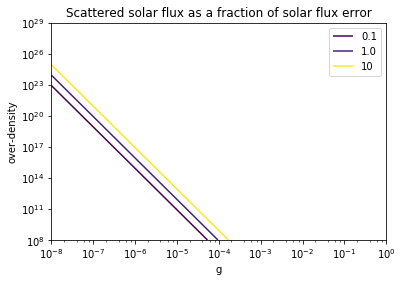

In [62]:
gridX, gridY = numpy.meshgrid(gx, ny)
Cols = ['DarkRed','DarkBlue']
CS = plt.contour(gridX,gridY,phi_eaten.T/(0.011*(0.86*phi_pp+0.14*phi_Be7)),levels=[0.1,1.0,10.0] )
plt.loglog()
plt.xlabel('g')
plt.ylabel('over-density')
plt.title('Scattered solar flux as a fraction of solar flux error')
labels = ['0.1', '1.0','10']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])
plt.legend(loc='upper right')
plt.savefig('solar-constraint.png')
plt.show()
plt.close()

In [ ]:
hbarc

In [63]:
#phi_eaten/(0.011*(phi_pp+phi_Be7))


In [54]:
gridX.shape


(400, 200)

In [64]:
phi_eaten.shape


(200, 400)

In [40]:
phi_eaten[0:12,20
         ]

array([  4.13749173e+03,   1.99962089e+05,   9.66402827e+06,
         4.67055745e+08,   2.25724783e+10,   1.09091213e+12,
         5.27230222e+13,   2.54806688e+15,   1.23146295e+17,
         5.95157452e+18,   2.87635445e+20,   1.39012204e+22])

In [42]:
gx[0:40
  ]


array([  1.00000000e-08,   2.63665090e-08,   6.95192796e-08,
         1.83298071e-07,   4.83293024e-07,   1.27427499e-06,
         3.35981829e-06,   8.85866790e-06,   2.33572147e-05,
         6.15848211e-05,   1.62377674e-04,   4.28133240e-04,
         1.12883789e-03,   2.97635144e-03,   7.84759970e-03,
         2.06913808e-02,   5.45559478e-02,   1.43844989e-01,
         3.79269019e-01,   1.00000000e+00])

In [44]:
eqn9(gx[0:40
       ],Enupp)

array([  2.92613045e-42,   1.41417843e-40,   6.83462572e-39,
         3.30312693e-37,   1.59637820e-35,   7.71518449e-34,
         3.72869484e-32,   1.80205220e-30,   8.70919259e-29,
         4.20909202e-27,   2.03422481e-25,   9.83126660e-24,
         4.75138257e-22,   2.29631005e-20,   1.10979063e-18,
         5.36354043e-17,   2.59215605e-15,   1.25263964e-13,
         6.02340976e-12,   2.34090410e-10])